## Final Project Submission

Please fill out:
* Student name: Kristen Tokunaga
* Student pace: part time 
* Scheduled project review date/time: 4/18/19
* Instructor name: Brandon Lewis
* Blog post URL: https://kristentaytok.github.io/

# OSEMN = Obtain, scrub, explore, model, interpret
The data was obtained using the pandas read CSV function to import the file into a pandas dataframe. Null values were removed (i.e., dropped "nan" rows for view) or filled with the median (i.e., waterfront, year renovated), and other strings (i.e., "?") were also filled (with "nan", then rows were dropped) to help convert the data type from "object" to "float". Linear regression assumptions were checked and resolved (by taking the log of variables with skewed distributions) to achieve normality, linearity, and homoscedasticity--which helped increase the r-squared value of our model to bring it closer to 1, indicating a higher correlation of our predictor variables to the target variable (price) and has a high goodness of fit. The predictor variables with the highest correlation to price were: square footage of the living space, square footage of the space above the basement, square footage of the living space among the 15 nearest neighbors, and grade of the house (set by the King County grading system). A linear regression model was created using the predictor variables and the target variable, and validated using the train-test split and cross-validation methods to analyze the mean squared error of samples of the split dataset--which compares the actual vs. predicted values across the samples. The consistent and low value of the cross-validation MSE and small difference between the test and train MSEs indicate the model is not overfitting, and therefore generalizable to future cases.   

# Obtain Data
1. Import necessary libraries
2. Load and view dataset

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
kc_house_df = pd.read_csv('kc_house_data.csv')
print(kc_house_df.shape)
kc_house_df.head()
# Your code here - remember to use markdown cells for comments as well!

FileNotFoundError: File b'kc_house_data.csv' does not exist

Check for null values and get a count of null values for each column.

In [2]:
print(kc_house_df.isna().sum())
kc_house_df.describe()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


View unique values of columns with null values to help figure out what to do with them.

In [3]:
print(kc_house_df['waterfront'].unique())
print(kc_house_df['view'].unique())
print(kc_house_df['yr_renovated'].unique())
print(kc_house_df['sqft_basement'].unique())
print(kc_house_df['grade'].unique())
print(kc_house_df['condition'].unique())

[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '4

Check for data types (int vs. float vs. object [string])

In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Scrub the Data
1. Subsampling: not necessary because the dataset is relatively small and easy to work with
2. Dealing with null values
3. Dealing with datatypes
4. Checking for multicolinearity
5. Remove unnecessary columns

In [5]:
column = ['view']
kc_house_df_dropviewna = kc_house_df.dropna(axis=0, how='any', subset = column)
kc_house_df_dropviewna.isna().sum()
#'View' column had 63/21,000 records with null values. Given such a small number of rows and view values 0-4 are not continuous (description = "Has been viewed"), I dropped all rows containing null values for 'view'.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Columns 'waterfront', 'condition', and 'grade' are all likely categorical datatypes, however they all are currently encoded as numerical datatypes in the original dataset. This is confirmed by looking at the unique values, which show discrete numbers. Additionally, waterfront contains null values. 

In [6]:

kc_house_df_dropviewna.waterfront = kc_house_df_dropviewna.waterfront.astype('str')
kc_house_df_dropviewna.condition = kc_house_df_dropviewna.condition.astype('str')
kc_house_df_dropviewna.grade = kc_house_df_dropviewna.grade.astype('str')

columns = ['yr_renovated']
kc_house_df_fillna = kc_house_df_dropviewna.fillna(kc_house_df_dropviewna[columns].median()) 
print(kc_house_df_fillna.isna().sum())
kc_house_df_fillna.info()
#Removing null values for 'waterfront' and 'yr_renovated' would have resulted in removing ~1/4 of our data (5000/21,000) which could result in losing a lot of valuable information. To help preserve the statistical distribution of the dataset, 'waterfront' was converted to string datatype where the unique values are either 'nan', '0', or '1'; while the null values ('nan') were replaced or "filled" by the median for 'yr_renovated'.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null object
view             21534 non-null float64
condition        21534 non-null object
grade            21534 non-null object
sqft_above 

/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Checking for any remaining null or invalid values. 

In [7]:
print(kc_house_df_fillna.shape)
print(kc_house_df_fillna.info())
kc_house_df_fillna['sqft_basement'].replace('?','nan',inplace=True)
kc_house_df_fillna['sqft_basement'] = kc_house_df_fillna['sqft_basement'].astype('float64')
print(kc_house_df_fillna.isna().sum())
column = ['sqft_basement']
kc_house_df_dropsqft_basementna = kc_house_df_fillna.dropna(axis=0, how='any', subset = column)
print(kc_house_df_dropsqft_basementna.shape)
print(kc_house_df_dropsqft_basementna.info())
kc_house_df_dropsqft_basementna.describe()
#sqft_basement had a '?' when we looked at its unique values, which prevents it from being converted to a numeric datatype. To deal with this invalid value, I first converted it to a 'nan', converted it to a float datatype, then dropped the rows with 'nan' values because it only accounted for 452 values out of ~21,500. 

(21534, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null object
view             21534 non-null float64
condition        21534 non-null object
grade            21534 non-null object
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(7), int64(9), object(5)
memory usage: 3.6+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.233327,1789.000000,291.359975,1971.023337,68.359359,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.765066,828.369355,442.007858,29.323120,363.029573,53.528769,0.138568,0.140607,685.544250,27148.781580
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check for multicolinearity using a correlation heatmap (diverging colormap). 

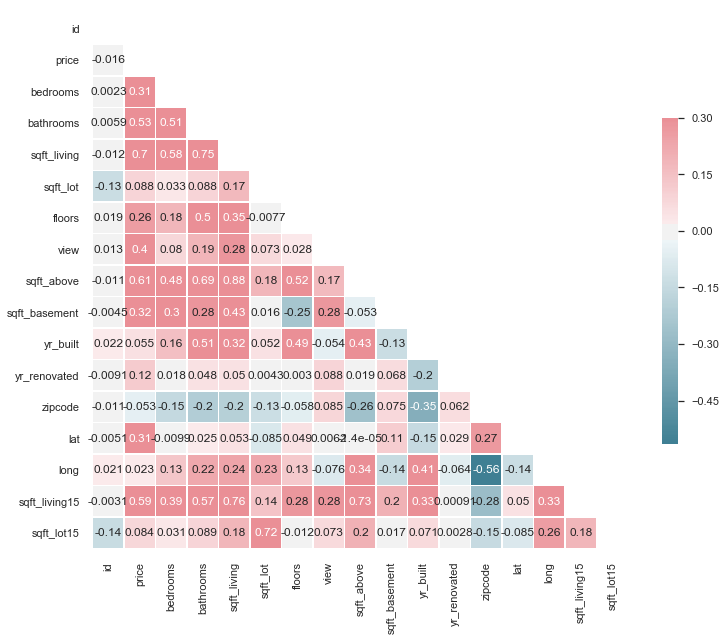

In [42]:
sns.set(style="white")
corr = kc_house_df_dropsqft_basementna.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
#Square footage of home is most highly correlated with price (our target variable). Square footage above the basement, bathrooms, and square footage of the living space for the nearest 15 neighbors are also correlated with price. 

Build a correlation matrix to identify predictors with an absolute value indicating a high correlation with other predictor variables, which will come up as 'True' in the table below. A predictor with an absolute value of around 0.7-0.8 is considered highly correlated, and we would want to know if it's highly correlated in a positive or negative relationship. 

The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. Because the idea behind regression is that you can change one variable and keep the others constant, correlation is a problem, because it indicates that changes in one predictor are associated with changes in another one as well. Because of this, the estimates of the coefficients can have big fluctuations as a result of small changes in the model. As a result, you may not be able to trust the p-values associated with correlated predictors. So, to meet the OLS linear regression assumptions, we may need to remove some predictor variables to minimize errors in our model.

In [9]:
data_pred= kc_house_df_dropsqft_basementna.iloc[:,3:]
abs(data_pred.corr()) > 0.75

#Some of the predictors have some correlation with each other, but their relationships make sense (e.g., size of house is correlated with size of house above basement, number of bathrooms). Square footage of the nearest 15 neighbors is also highly correlated with square footage of the house.

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Using a jointplot to check our assumptions for normality, linearity, and homoscedasticity.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


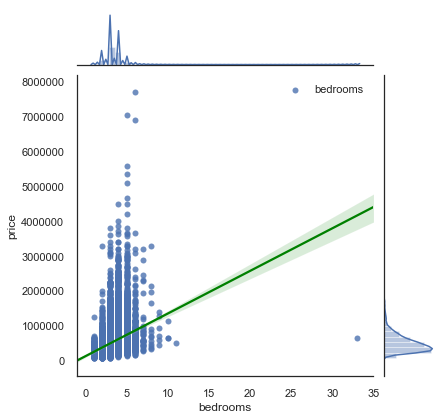

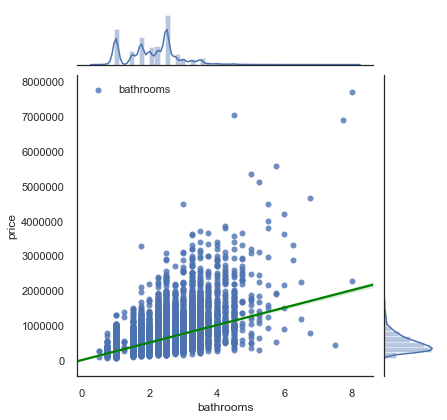

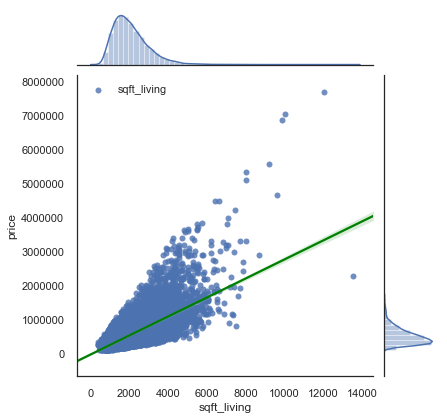

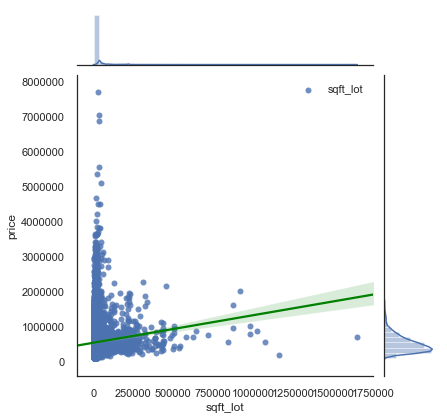

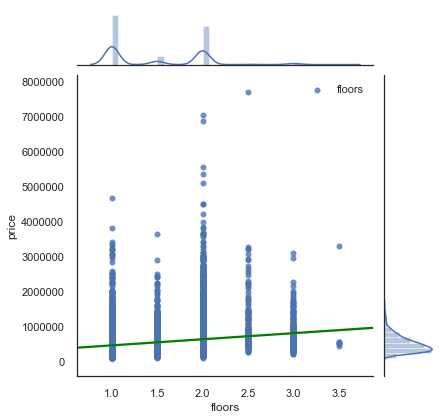

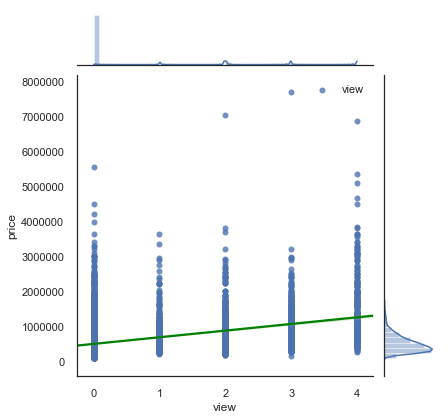

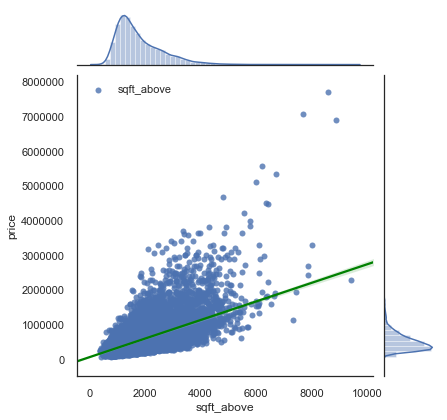

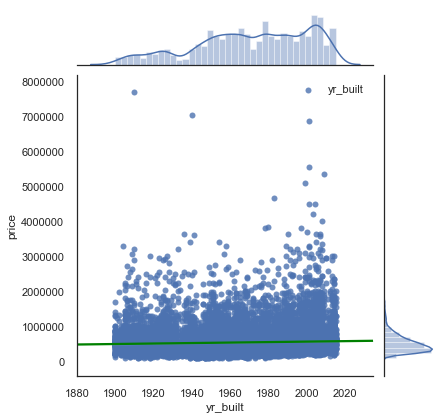

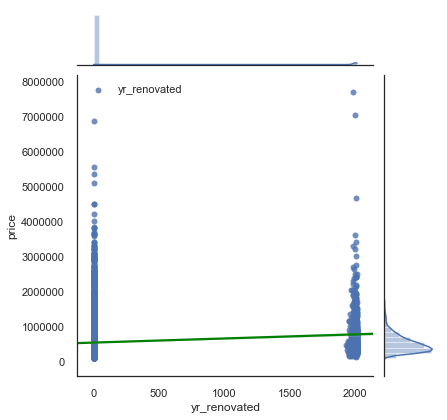

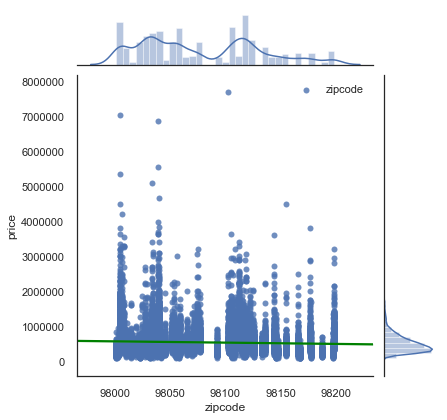

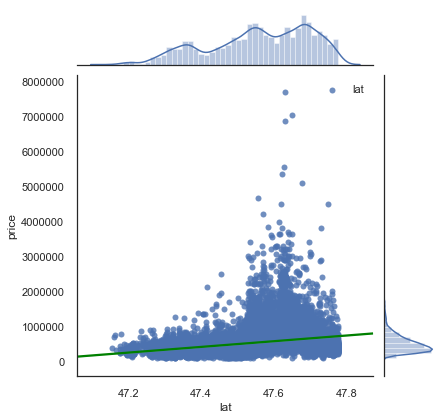

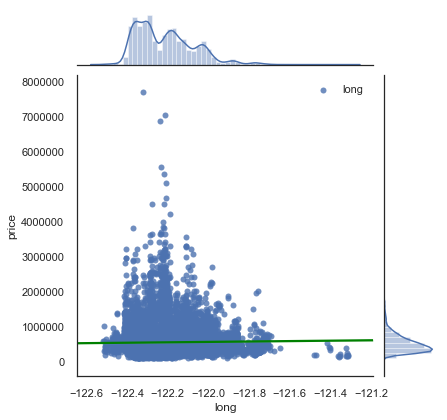

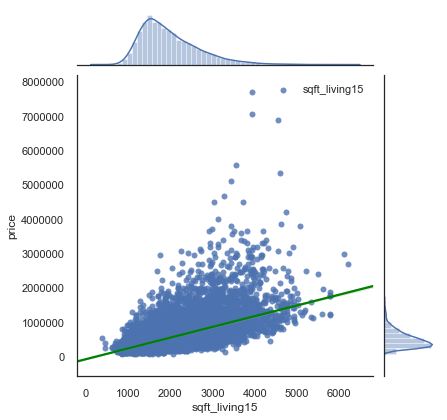

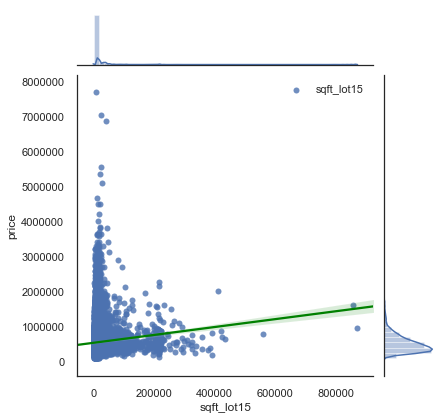

In [10]:

for column in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=kc_house_df_dropsqft_basementna, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()
#The scatterplots with regression lines of the jointplot above confirm the positive linear relationships between some of our predictors with the housing prices in KC; however, there appears to be some heteroscedasticity of values around the regression line. Among the top 4 correlated predictor variables (sqft_living, sqft_above, grade, and sqft_living15), sqft_living, sqft_above, and sqft_living 15 follows a normal distribution--as indicated by the histograms and KDEs of the jointplot above; however, they all appear to have a positive skew.   


Variables with string datatypes do not get factored into regression and correlation analyses. Additionally, certain columns may not have direct effects on housing prices in the form by which they are included in our dataset: for example, 'id' is a dataframe identifier for each row, which has no effect on house prices and 'date' (on which the house was sold between 2014 and 2015) likely doesn't have an effect on the house of the price today; and while location can have an effect, it's not one that can be definitevely correlated by statistically comparing numeric values of zip code, latitude, and longitude. Due to multicolinearity identified on the correlation matrix previously, I have also decided to drop sqft_living15, sqft_above, and bathrooms for this analysis. 

# Explore the Data
1. Understand data
2. Derive statistics
3. Create visualizations

In [15]:
# build a subset of numerical variables
subsets = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_basement', 
           'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# make the statistics easier to read and understand
data_descriptives = round(kc_house_df_dropsqft_basementna[subsets].describe(), 3)
data_descriptives 
#https://github.com/BrittaInData/dsc-1-final-project-online-ds-ft-100118/blob/master/01_Final_Notebook.ipynb
#Some variables have very large standards of deviation (e.g., price, sqft_lot, view, sqft_basement, sqft_lot15)--when comparing standard deviation to their respective means. This indicates there are likely major outliers in the data. A large majority of houses were not viewed before they were sold, as indicated by the 25%, 50%, and 75% (1st, 2nd, and 3rd quartiles) being 0. These measures of spread indicate that 75% of the houses in this dataset were sold with 0 views. 

,price,bedrooms,sqft_living,sqft_lot,floors,view,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000,21082.000
mean,540246.890,3.372,2080.360,15077.588,1.494,0.233,291.360,1971.023,68.359,1986.917,12732.514
std,366732.337,0.925,917.856,41173.379,0.539,0.765,442.008,29.323,363.030,685.544,27148.782
min,78000.000,1.000,370.000,520.000,1.000,0.000,0.000,1900.000,0.000,399.000,651.000
25%,322000.000,3.000,1430.000,5040.000,1.000,0.000,0.000,1952.000,0.000,1490.000,5100.000
50%,450000.000,3.000,1910.000,7620.000,1.500,0.000,0.000,1975.000,0.000,1840.000,7626.000
75%,645000.000,4.000,2550.000,10697.750,2.000,0.000,560.000,1997.000,0.000,2360.000,10088.750
max,7700000.000,33.000,13540.000,1651359.000,3.500,4.000,4820.000,2015.000,2015.000,6210.000,871200.000


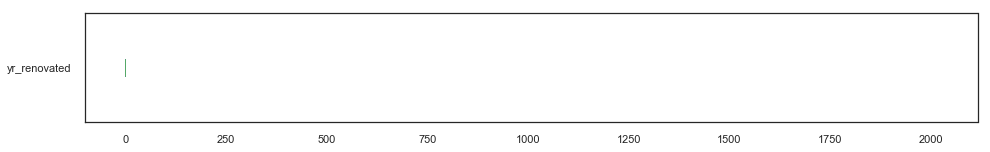

In [16]:
kc_house_df_dropsqft_basementna['yr_renovated'].plot(kind='box', vert=False, figsize=(16,2));
#The yr_renovated scatterplot showed a large gap in between 0 and ~2000 and this is confirmed by the 1st, 2nd, and 3rd quartiles being 0 in the descriptive statistics table above and the box plot below. It may be helpful to bin these to help visualize different decades of renovation, since the unique values show renovations ranging from the 1930s to 2010s. 

In [21]:
# Binning
bins = [0., 1930., 1950., 1980., 1990., 2000., 2015.]
names = ['never', '1930-1950', '1950-1979', '1980-1989', '1990-1999', '2000-2015']
kc_house_df_dropsqft_basementna['yr_ren_cat'] = pd.cut(kc_house_df_dropsqft_basementna['yr_renovated'], bins, labels=names, right=False)

print('\n*** Unique Values ***')
print(kc_house_df_dropsqft_basementna.yr_ren_cat.unique())
print('\n*** Value Counts ***')
print(kc_house_df_dropsqft_basementna.yr_ren_cat.value_counts())
#https://github.com/BrittaInData/dsc-1-final-project-online-ds-ft-100118/blob/master/01_Final_Notebook.ipynb


*** Unique Values ***
[never, 1990-1999, 2000-2015, 1950-1979, 1980-1989, 1930-1950, NaN]
Categories (6, object): [never < 1930-1950 < 1950-1979 < 1980-1989 < 1990-1999 < 2000-2015]

*** Value Counts ***
never        20360
2000-2015      356
1990-1999      137
1980-1989      121
1950-1979       87
1930-1950        7
Name: yr_ren_cat, dtype: int64


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


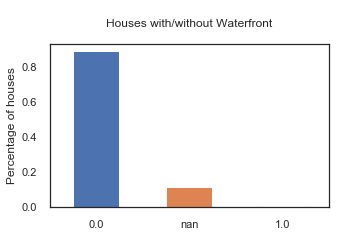

In [39]:
#Categorical values cannot be used in linear regressional analysis, but may provide great insights through the use of histograms. 
kc_house_df_dropsqft_basementna.waterfront.value_counts(normalize=True).plot.bar(rot=0, sort_columns=True, 
                                                    title="\nHouses with/without Waterfront\n", figsize=(5,3))
plt.ylabel('Percentage of houses');
#Not all houses can be on the waterfront, and everyone has got to live somewhere. 
#https://github.com/BrittaInData/dsc-1-final-project-online-ds-ft-100118/blob/master/01_Final_Notebook.ipynb

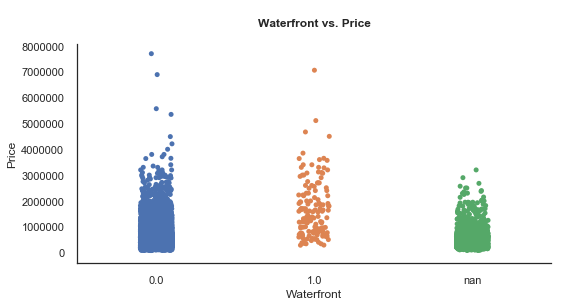

In [41]:
sns.catplot(x="waterfront", y="price", data=kc_house_df_dropsqft_basementna, height=4, aspect=2)
plt.title('\nWaterfront vs. Price\n', fontweight='bold')
plt.xlabel('Waterfront')
plt.ylabel('Price');
#While a majority of houses sold were not on the waterfront, the prices at which houses were sold appears to be higher 
#https://github.com/BrittaInData/dsc-1-final-project-online-ds-ft-100118/blob/master/01_Final_Notebook.ipynb

In [23]:

import statsmodels.api as sm
from statsmodels.formula.api import ols
kc_house_features = kc_house_df_dropsqft_basementna.drop(['id', 'date', 'price','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_above', 'bathrooms', 'grade', 'condition', 'waterfront', 'yr_ren_cat'], axis=1)
kc_house_target = kc_house_df_dropsqft_basementna[['price']]
data = pd.concat([kc_house_features, kc_house_target], axis=1)
predictors = kc_house_features
predictors_int = sm.add_constant(predictors)
model = sm.OLS(data['price'],predictors_int).fit()
model.summary()
#This model has an R-squared of 0.58--which means that 58% of the variations in price are explained by the independent variables included in this model. Dropped 'id', 'date (sold)', 'zipcode', 'lat', and 'long' due to categorical (non-continuous) information and/or does not have any apparent correlation with price.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     3247.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        07:35:09   Log-Likelihood:            -2.9085e+05
No. Observations:               21082   AIC:                         5.817e+05
Df Residuals:                   21072   BIC:                         5.818e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.993e+06   1.32e+05     37.897      0.000    4.73e+06    5.25e+06
bedrooms      -5.203e+04   2197.386    -23.678      0.000   -5.63e+04   -4.77e+04
sqft_living     313.1419      2.834    110.489      0.000     307.587     318.697
sqft_lot         -0.0980      0.057     -1.708      0.088      -0.210       0.014
floors         5.989e+04   3957.673     15.133      0.000    5.21e+04    6.76e+04
view           8.777e+04   2302.067     38.126      0.000    8.33e+04    9.23e+04
sqft_basement   -28.1211      4.812     -5.844      0.000     -37.552     -18.690
yr_built      -2548.0311     68.189    -37.367      0.000   -2681.688   -2414.374
yr_renovated     25.7315      4.658      5.524      0.000      16.602      34.861
sqft_lot15       -0.6315      0.087     -7.218      0.000      -0.803      -0.460
==============================================================================
Omnibus:                    13184.281   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474632.196
Skew:                           2.458   Prob(JB):                         0.00
Kurtosis:                      25.719   Cond. No.                     4.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


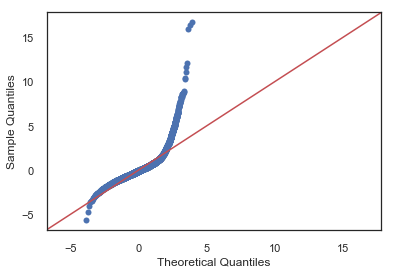

In [32]:
import scipy.stats as stats

import statsmodels.formula.api as smf
f = 'price~sqft_living'
model = smf.ols(formula=f, data=data).fit()

resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True,)
fig.show()
#The QQplots below show the error terms (residuals) from the model against a standard normal distribution. The deviation of the curve from the straight line shows the residuals do not match what we would expect from a normal distribution, and is consistent with a skewed distribution. 

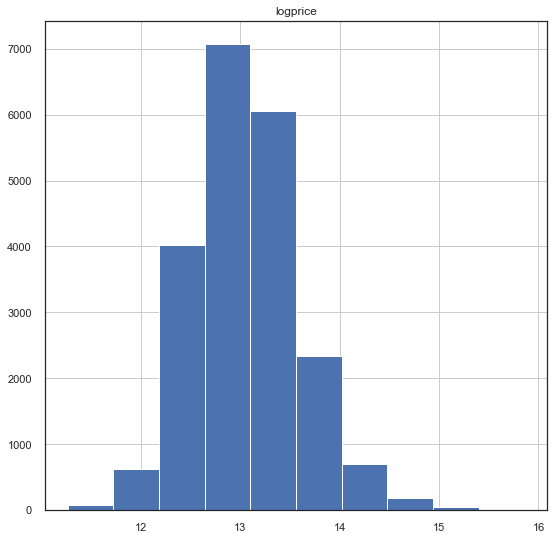

In [36]:
import numpy as np
data_log = pd.DataFrame([])
data_log["logprice"] = np.log(kc_house_target["price"])

data_log.hist(figsize  = [9, 9]);
#Most of the skews are resolved by taking the log of the variable, as seen by the distributions below. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally. #https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation)

In [37]:
data_log.describe()

,logprice
count,21082.000000
mean,13.048217
std,0.526394
min,11.264464
25%,12.682307
50%,13.017003
75%,13.377006
max,15.856731


In [38]:
kc_house_logtarget = data_log[['logprice']]
data = pd.concat([kc_house_features, kc_house_logtarget], axis=1)
predictors_log = kc_house_features
predictors_int_log = sm.add_constant(predictors_log)
model = sm.OLS(data['logprice'],predictors_int_log).fit()
model.summary()
#All of the p-values (P > |t|) [except yr_renovated and sqft_above] are < 0.05, indicating that the relationships between the independent (predictor) variables and price are statistically significant, and therefore this model's verdict on the null hypothesis will consistently represent the larger population. The adjusted R-squared has remained the same with the log transformation of the skewed variables (price, grade, sqft living, sqft above, sqft living15)--suggesting that this model is a similarly better fit than the baseline model (i.e., 65% of the variance in price is predictable from the linear regression model created by the above independent variables).  The skewness went from 3.0 to -0.036, resulting in a more normalized distribution. The kurtosis also decreased, indicating that the log transformation helped push the peak toward the enter of distribution and normalized the data.   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     2746.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        07:44:59   Log-Likelihood:                -8204.8
No. Observations:               21082   AIC:                         1.643e+04
Df Residuals:                   21072   BIC:                         1.651e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.1852      0.193     73.572      0.000      13.807      14.563
bedrooms         -0.0660      0.003    -19.168      0.000      -0.073      -0.059
sqft_living       0.8860      0.010     92.376      0.000       0.867       0.905
sqft_lot        1.92e-07   8.62e-08      2.227      0.026     2.3e-08    3.61e-07
floors            0.1737      0.006     29.201      0.000       0.162       0.185
view              0.1076      0.003     31.323      0.000       0.101       0.114
sqft_basement  2.346e-05   7.23e-06      3.244      0.001    9.28e-06    3.76e-05
yr_built         -0.0040      0.000    -38.590      0.000      -0.004      -0.004
yr_renovated   2.214e-05   7.01e-06      3.157      0.002     8.4e-06    3.59e-05
sqft_lot15    -4.755e-07   1.31e-07     -3.616      0.000   -7.33e-07   -2.18e-07
==============================================================================
Omnibus:                        6.709   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                7.139
Skew:                          -0.009   Prob(JB):                       0.0282
Kurtosis:                       3.088   Cond. No.                     3.94e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


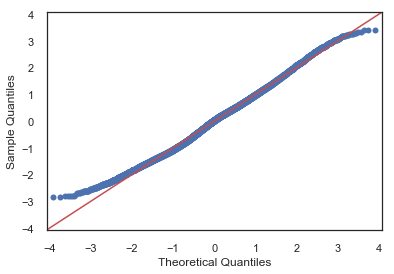

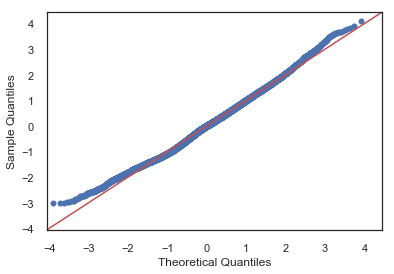

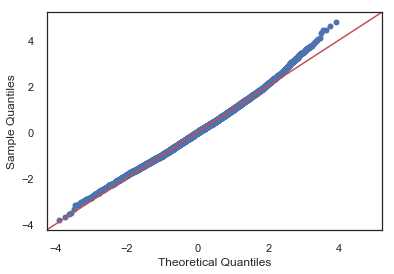

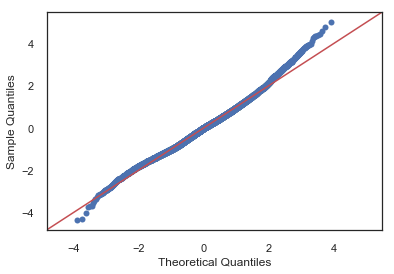

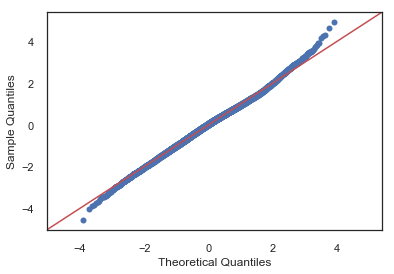

In [18]:
import scipy.stats as stats

import statsmodels.formula.api as smf
f5 = 'logprice~sqft_living'
f6 = 'logprice~sqft_above'
f7 = 'logprice~grade'
f8 = 'logprice~sqft_living15'
model5 = smf.ols(formula=f5, data=data).fit()
model6 = smf.ols(formula=f6, data=data).fit()
model7 = smf.ols(formula=f7, data=data).fit()
model8 = smf.ols(formula=f8, data=data).fit()

resid5 = model5.resid
resid6 = model6.resid
resid7 = model7.resid
resid8 = model8.resid
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True,   )
fig = sm.graphics.qqplot(resid6, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid7, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid8, dist=stats.norm, line='45', fit=True)
fig.show()



residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()
#

In [19]:

from sklearn.linear_model import LinearRegression
X = kc_house_features
y = data_log[['logprice']]

linreg = LinearRegression()
linreg.fit(X, y)
print(linreg.coef_)
linreg.intercept_


[[-3.59000404e-02  8.40827363e-02  1.81422966e-01  2.63522602e-07
   1.16836931e-01  3.77542972e-01  4.57666361e-02  3.56782194e-02
   1.63763400e+00  4.18520499e-02  1.01576035e-04 -5.91492082e-03
   1.15983336e-05  2.50093427e-01 -4.57916089e-07]]


array([17.43164033])

In [20]:
from sklearn.model_selection import train_test_split
#Initializing the model class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
linreg = LinearRegression()
#Fitting the model to the train data
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
#Calculating predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
#Calculating the mean squared error (to compare overall performance: the actual vs. the predicted values) on the train and test sets
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
#Because the test error is not worse than the train error, this suggests the model generalizes well to future cases (i.e., there is no overfitting of our model). 

Train Mean Squared Error: 0.09620096941349496
Test Mean Squared Error: 0.09549079497944424


In [21]:
#Because the train and test samples are created from random samples of the data, the MSEs are strongly dependent on the sample used (e..g, the split of 70-30 vs. othe ratio, and the sample data that are used to create the split). The quality of the model must also be validated using cross valiadtion, where the average of iteravely trained and tested linear regression models are sampled from k number of slices of the dataset to get a cross-validation MSE (which is supposed to be loser to the model's actual MSE). 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score  

print('R^2:', metrics.r2_score(y_train, y_hat_train))  #https://www.kaggle.com/shreayan98c/boston-house-price-prediction
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_hat_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))  #https://www.kaggle.com/shreayan98c/boston-house-price-prediction
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_results
#The r-squared and adjusted r-sqaured are similar to the OLS calculation, and relatively close to 1 indicating a strong correlation between the predictor variables and price. The cv is also consistent with the train and test mean squared error results and a consistently low error is good because it means that the model is good at predicting actual price values.

R^2: 0.6533509532313156
Adjusted R^2: 0.6529982135459802


-0.09650046992375458

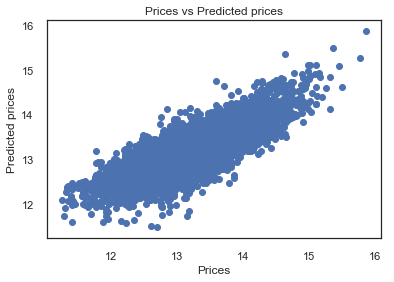

In [22]:
plt.scatter(y_train, y_hat_train)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()
# https://www.kaggle.com/shreayan98c/boston-house-price-prediction. Visualizing the differences between actual prices and predicted values.

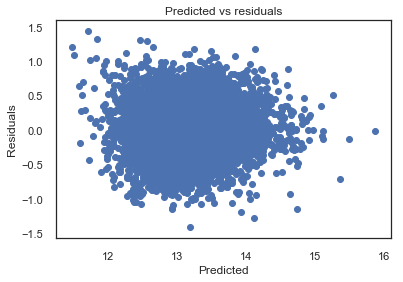

In [23]:
plt.scatter(y_hat_train,y_train-y_hat_train)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
#https://www.kaggle.com/shreayan98c/boston-house-price-prediction. There is no visible pattern in this plot with values relatively equally distributed around the zero, satisfying the linearity assumption.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


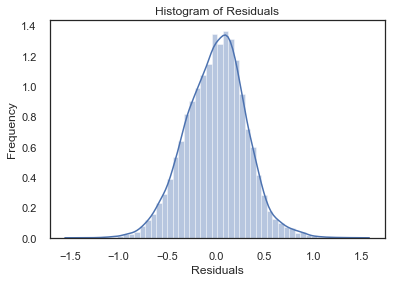

In [24]:
sns.distplot(y_train-y_hat_train)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
#https://www.kaggle.com/shreayan98c/boston-house-price-prediction. The normal distribution of the residuals shows the normality assumption is satisfied.

In [ ]:
#Question: What are the top 3 features that correlate with housing prices (i.e., contribute to maximzing profits for homeowners who wish to sell their homes)?
#Answer: Square footage of home/living space, grade of the house, and square footage of the house above the basement. 

In [35]:
#Question: What is the predicted/recommended selling price for a client who has a sqfoot_living = 3200, sqft_above = 3200, and grade of 7?  house_features['sqft_living','grade','sqft_above']
X_subset = kc_house_features.iloc[:,3,9,10]
X_subset_train, X_subset_test, y__subset_train, y_subset_test = train_test_split(X_subset, y, test_size = 0.3)
linreg = LinearRegression()
#Fitting the model to the train data
linreg.fit(X_subset_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
#Calculating predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_subset_train)
y_hat_test = linreg.predict(X__subset_test)
#Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
#Calculating the mean squared error (to compare overall performance: the actual vs. the predicted values) on the train and test sets
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('R^2:', metrics.r2_score(y_train, y_hat_train))  #https://www.kaggle.com/shreayan98c/boston-house-price-prediction
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_hat_train))*(len(y_train)-1)/(len(y_train)-X_subset_train.shape[1]-1))  #https://www.kaggle.com/shreayan98c/boston-house-price-prediction
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
print(cv_20_results)


client_data = [[3200, 7, 3200]] #https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d   
for i, price in enumerate(linreg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))    

IndexingError: Too many indexers